In [29]:
import xarray as xr
import os

import pyaerocom as pya
import cartopy.feature as cfeature
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import glob

import pyaerocom as pya
import iris

In [30]:
path = "/home/hannas/Desktop/pyaerocom-suppl/htap_masks/"
files =  glob.glob(path + '*0.1*.nc')

In [31]:
xr.open_dataset(files[0])

<xarray.Dataset>
Dimensions:  (lat: 1800, long: 3600)
Coordinates:
  * lat      (lat) float64 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * long     (long) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
Data variables:
    PANhtap  (lat, long) float64 ...
Attributes:
    Conventions:               CF-1.0
    Source_Software:           ESRI ArcGIS
    history:                   Wed Oct  5 09:52:25 2016: ncap2 -o PANhtap.0.1...
    nco_openmp_thread_number:  1

In [32]:
from pyaerocom import const

In [33]:
# const.LANDSEA_MASK

In [34]:
def load_region_mask(region_id='PANhtap'):
    """
    Returns
    ---------
    xarray.DataArray containing the masks. 
    """
    path = '//home/hannas/Desktop/htap/'  # get from config
    path = "/home/hannas/Desktop/htap/"
    path = "/home/hannas/Desktop/pyaerocom-suppl/htap_masks/"
    
    fil =  glob.glob(path + "*{}*0.1*.nc".format(region_id))[0]
    masks = xr.open_dataset(fil)
    return masks[region_id]

In [35]:
mask = load_region_mask(region_id='LANDhtap')
example_mask = load_region_mask(region_id='LANDhtap')

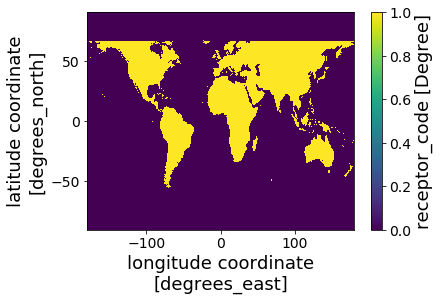

In [36]:
mask.plot()

In [9]:
def available_region_htap_mask():
    arr = []
    path = "/home/hannas/Desktop/pyaerocom-suppl/htap_masks/"
    files =  glob.glob(path + '*0.1*.nc')
    for fil in files:
        arr.append(os.path.basename(fil).split('.')[0])
    return arr

In [10]:
available_region_htap_mask()

['PANhtap',
 'EAShtap',
 'NAFhtap',
 'MDEhtap',
 'LANDhtap',
 'SAShtap',
 'SPOhtap',
 'OCNhtap',
 'SEAhtap',
 'RBUhtap',
 'EEUROPEhtap',
 'NAMhtap',
 'WEUROPEhtap',
 'SAFhtap',
 'USAhtap',
 'SAMhtap',
 'EURhtap',
 'NPOhtap',
 'MCAhtap']

In [11]:
# pya.io.ReadUngridded.read?

In [12]:
YEAR = 2010
VAR = "od550aer"
TS_TYPE = "daily"
MODEL_ID = "ECMWF_CAMS_REAN"
OBS_ID = 'AeronetSunV3Lev2.daily'

#OBS_ID = 'GAWTADsubsetAasEtAl'
#VAR = 'concso2'

obs_reader = pya.io.ReadUngridded(datasets_to_read=OBS_ID, vars_to_retrieve = VAR)
read_data  = obs_reader.read()
#bs_data   = obs_reader

['WORLD', 'wMOUNTAINS']


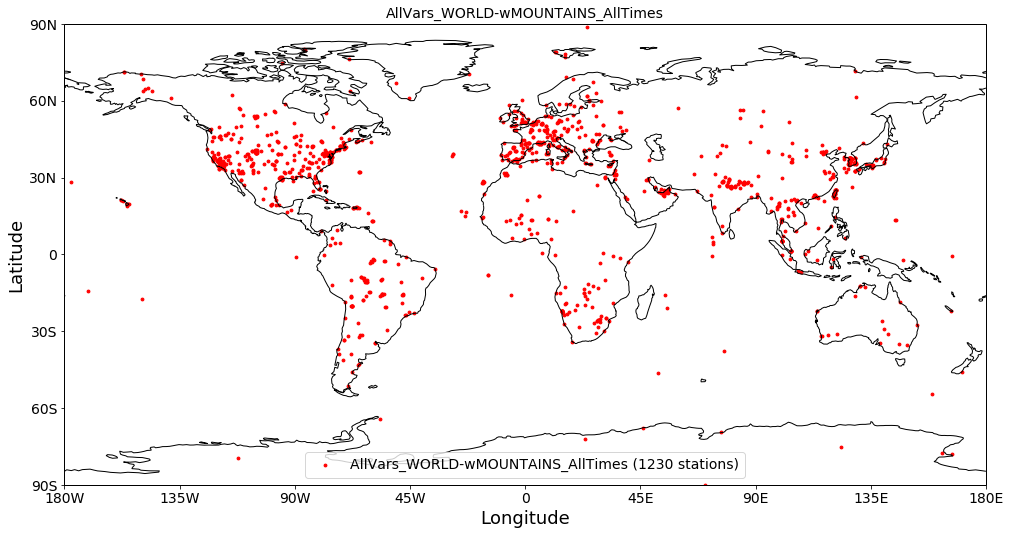

In [13]:
read_data.plot_station_coordinates()

# Filtering ungridded data object by looping over metadata entries

In [14]:
def get_mask(lat, lon, mask):
    """
    lat : float
    lon : float
    mask : array-like
    """
    la = np.around(lat, 2)
    lo = np.around(lon, 2) 
  
    mask_pixel = mask.sel(lat = slice(la + 0.1, la), long = slice(lo - 0.1, lo))
    m = mask_pixel.values[0][0]  
    return m

In [15]:
obs_reader = pya.io.ReadUngridded(datasets_to_read=OBS_ID, vars_to_retrieve = VAR)
read_data  = obs_reader.read()

/home/hannas/Desktop/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan


['WORLD', 'wMOUNTAINS']


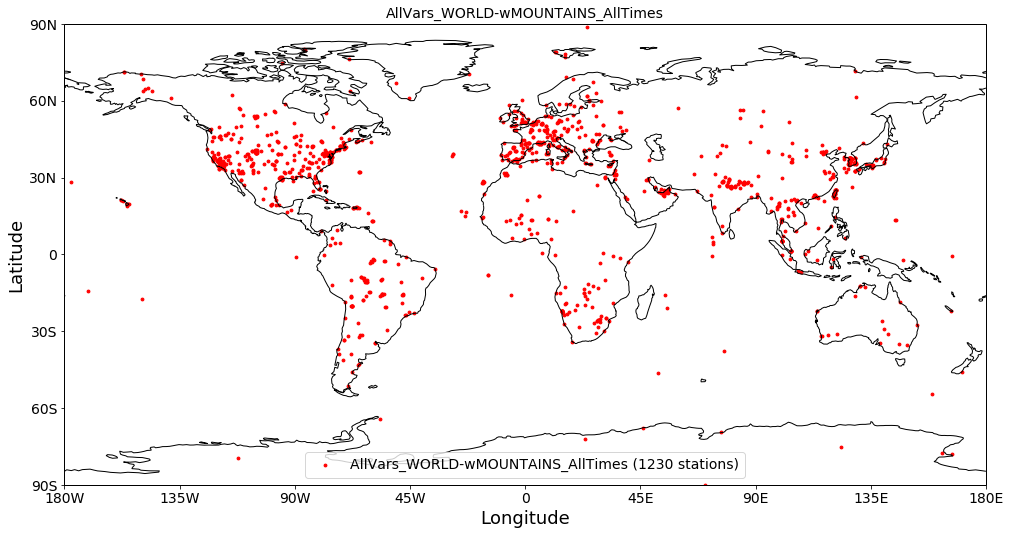

In [16]:
read_data.plot_station_coordinates()

In [17]:
obs_reader = pya.io.ReadUngridded(datasets_to_read=OBS_ID, vars_to_retrieve = VAR)
read_data  = obs_reader.read()

data      = read_data._data
_metadata = read_data.metadata

mask = load_region_mask(region_id='USAhtap')   

test = _metadata.copy().items()
data = read_data._data
indexes_to_drop = []

for key, meta in test:
    lat = meta['latitude']
    lon = meta['longitude']

    mask_pixel = get_mask( lat, lon, mask )
    
    if mask_pixel < 1:
        # remove station 
        #meta_indecies = meta[]
        del _metadata[key]
        indexes_to_drop.append(read_data.meta_idx[key][VAR]) # update to vars to read.
rem = np.concatenate(indexes_to_drop)
data_new = np.delete(data, rem, axis = 0)
read_data._data = data_new

# USA 

['WORLD', 'wMOUNTAINS']


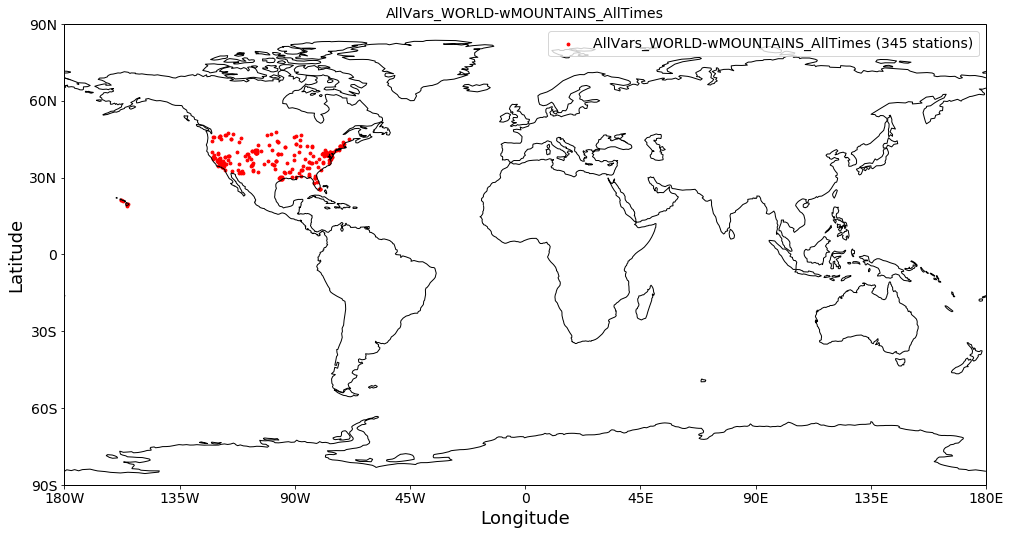

In [18]:
read_data.plot_station_coordinates()

# SOUTH EAST ASIA

In [19]:
obs_reader = pya.io.ReadUngridded(datasets_to_read=OBS_ID, vars_to_retrieve = VAR)
read_data  = obs_reader.read()

data      = read_data._data
_metadata = read_data.metadata

mask = load_region_mask(region_id='SEAhtap')   

test = _metadata.copy().items()
data = read_data._data
indexes_to_drop = []

for key, meta in test:
    lat = meta['latitude']
    lon = meta['longitude']

    mask_pixel = get_mask( lat, lon, mask )
    
    if mask_pixel < 1:
        # remove station 
        #meta_indecies = meta[]
        del _metadata[key]
        indexes_to_drop.append(read_data.meta_idx[key]['concso2']) # update to vars to read.
rem = np.concatenate(indexes_to_drop)
data_new = np.delete(data, rem, axis = 0)
read_data._data = data_new
read_data.plot_station_coordinates()

KeyError: 'concso2'

# OCEAN MASKS

In [ ]:
obs_reader = pya.io.ReadUngridded(datasets_to_read=OBS_ID, vars_to_retrieve = VAR)
read_data  = obs_reader.read()

data      = read_data._data
_metadata = read_data.metadata

mask = load_region_mask(region_id='OCNhtap')   

test = _metadata.copy().items()
data = read_data._data
indexes_to_drop = []

for key, meta in test:
    lat = meta['latitude']
    lon = meta['longitude']

    mask_pixel = get_mask( lat, lon, mask )
    
    if mask_pixel < 1:
        # remove station 
        #meta_indecies = meta[]
        del _metadata[key]
        indexes_to_drop.append(read_data.meta_idx[key][VAR]) # update to vars to read.
        
rem = np.concatenate(indexes_to_drop)
data_new = np.delete(data, rem, axis = 0)
read_data._data = data_new
ax = read_data.plot_station_coordinates()

# IRIS - Resampling for Satelitte data.

In [ ]:
mask = load_region_mask(region_id='LANDhtap')

In [ ]:
mask

In [ ]:
mask_grid = mask.to_iris()

In [ ]:
mask_grid

#  Regridding:
* Collocated data - Xarray data array
* Gridded data    - Cube iris
* Ungridded data  - numpy array (samples, 12)

In [ ]:
reader     = pya.io.ReadGridded(data_id = MODEL_ID)
model_data = reader.read_var(var_name='od550aer', ts_type = 'monthly')
model_data

In [ ]:
path = '/home/hannas/Desktop/htap/' 
fil =  glob.glob(path + 'LANDhtap' + '*0.1*.nc')[0]
mask_iris = iris.load_cube(fil)
#mask_iris.coord('longitude').guess_bounds()
#mask_iris.coord('latitude').guess_bounds()
M = pya.GriddedData(mask_iris)
M.cube

In [ ]:
M_regr = M.regrid(model_data)
M_regr

In [ ]:
mask_iris = iris.load_cube(fil)
M = pya.GriddedData(mask_iris)
update_gridded_data_cube = M.regrid(model_data)

In [ ]:
M_regr.quickplot_map(vmin=0, vmax=1, add_mean=False);

In [ ]:
npm = M_regr.cube.data.data
thresh_mask = npm <0.5
npm[thresh_mask] = 0
npm[~thresh_mask] = 1

In [ ]:
import numpy.ma as ma

In [20]:
try:
    cube_data = model_data.cube.data
    example = ma.array([1, 2, 3], mask = [0, 1, 0])
    
    if isinstance(cube_data, ma.core.MaskedArray):
            # UPDATE MASK WITH REGIONAL MASK.
            print("hellloooo")
except MemoryError:
    raise NotImplementedError

NameError: name 'model_data' is not defined

In [21]:
modis_aod = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer', start=2010)
modis_aod.cube.data

/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
Overwriting unit unknown in cube od550aer with value "1"


masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


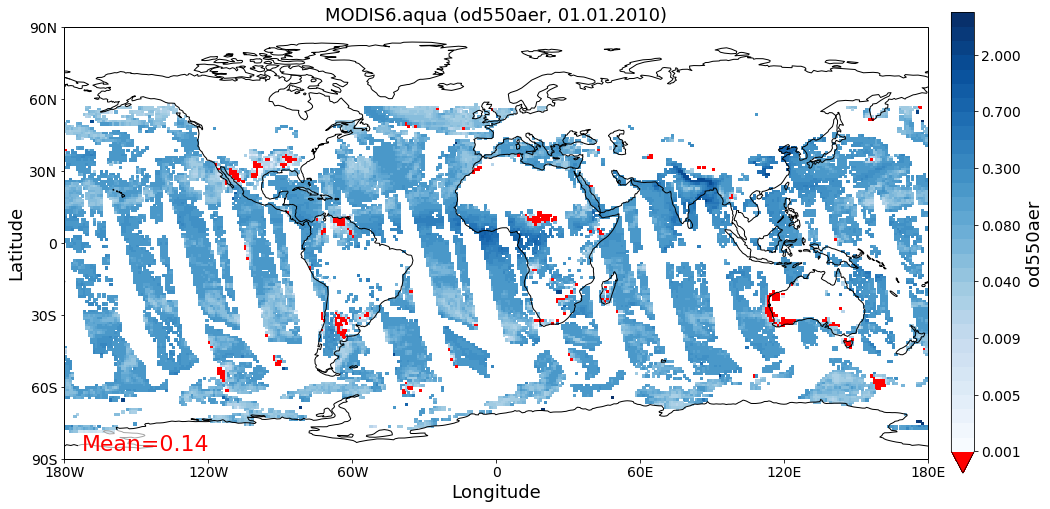

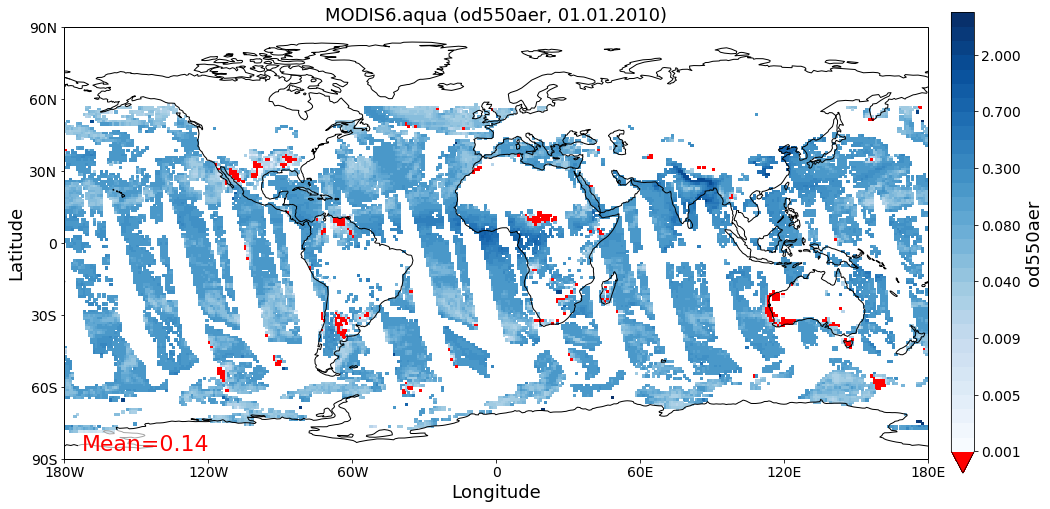

In [22]:
modis_aod.quickplot_map()

In [23]:
model_data

NameError: name 'model_data' is not defined

In [ ]:
model_data[0].cube

In [ ]:
mask_grid = mask_grid.regrid(model_data[0].cube, scheme = iris.analysis.AreaWeighted())

In [ ]:
def grt_rectangular_grid(fil):

    mask = xr.open_dataset(fil)
    var = os.path.basename(fil).split('.')
    
    m_long = np.repeat(mask['long'].values[:,np.newaxis], 1800)
    m_lat = np.repeat(mask['lat'].values[:,np.newaxis], 2*1800)

    m_long = m_long.reshape(1800, int(6480000/1800))
    m_lat = m_lat.reshape(int(6480000/3600), 3600)

    masks = mask[var[0]].values

    lon_min, lon_max = np.around(np.nanmin(masks*m_long),2), np.around(np.nanmax(masks*m_long), 2) 
    lat_min, lat_max = np.around(np.nanmin(masks*m_lat),2), np.around(np.nanmax(masks*m_lat), 2)
       
    #print(var)
    #print(mask.where())
    #try:
        #mask[var[0]].plot()
        #plt.show()
    #except:
    #    print('hello')
    #mask['source_code'].plot()
    
    print("[{}HTAP]".format(var[0][:-4]))
    print("lon_range={},{}".format( lon_min, lon_max))
    print("lat_range={},{}".format( lat_min, lat_max))
    return lat_min, lat_max, lon_min, lon_max, 

In [ ]:
for fil in files:
    grt_rectangular_grid(fil) 

In [ ]:
europe = pya.Region("EUROPE")
print(europe)

In [ ]:
lat = europe.lat_range
lon = europe.lon_range

In [ ]:
lat, lon

In [24]:
def plot_region(lat, lon, region):
    desired_projections = [ccrs.PlateCarree()]

    fig, axes = plt.subplots(nrows=1, ncols=1,
                             figsize=(12,15), 
                             sharex=True, sharey=True, 
                             subplot_kw = dict(projection=ccrs.PlateCarree()))
    ax = plt.subplot(2, 1, plot_num + 1, projection=desired_proj)
    ax.set_global()
    # ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)]

    # xy is The bottom and left rectangle coordinates

    for plot_num, desired_proj in enumerate(desired_projections):



        ax.add_patch(mpatches.Rectangle(xy=[lon[0], lat[0]], width=np.subtract(lon[1], lon[0]), 
                                        height=np.subtract(lat[1], lat[0]),
                                        facecolor='blue',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
        import cartopy.feature as cfeature
        states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_0_boundary_lines_land',
                                                scale='50m',
                                                facecolor='none')
        ax.add_feature(states_provinces, edgecolor='gray')
        
        """
        ax.add_patch(mpatches.Rectangle(xy=[lon[0], lat[0]], width=np.subtract(lon[1], lon[0]), 
                                        height=np.subtract(lat[1], lat[0]),
                                        facecolor='red',
                                        alpha=0.2,
                                        transform=ccrs.Geodetic())
                     )
        """
        ax.set_title(" {}, lon_range {}, lat_range{}".format(region, lon, lat))
        ax.gridlines()
        ax.coastlines()

    plt.show()
    return 

# Plot all reagions avalable in PyAEROCOM

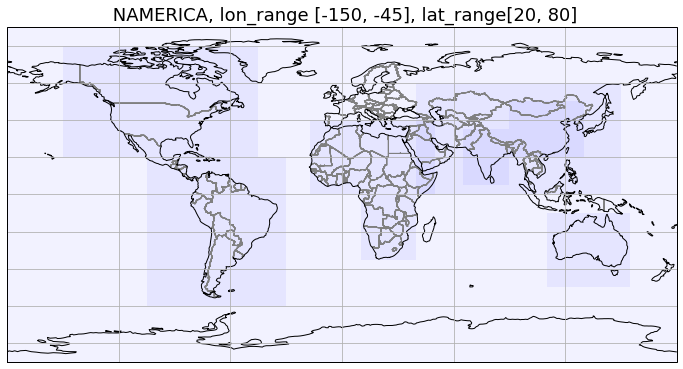

In [25]:
all_regions = pya.region.all()
desired_projections = [ccrs.PlateCarree()]

fig, axes = plt.subplots(nrows=1, ncols=1,
                         figsize=(12,15), 
                         sharex=True, sharey=True, 
                         subplot_kw = dict(projection=ccrs.PlateCarree()))
ax = plt.subplot(2, 1, 1 + 1, projection=ccrs.PlateCarree())
ax.set_global()
    
for region in all_regions[1:]:
    r = pya.Region(region)
    lon = r.lon_range
    lat = r.lat_range
    
    ax.add_patch(mpatches.Rectangle(xy=[lon[0], lat[0]], width=np.subtract(lon[1], lon[0]), 
                                    height=np.subtract(lat[1], lat[0]),
                                    facecolor='blue',
                                    alpha=0.05,
                                    transform=ccrs.PlateCarree())
                )
    
    bound_lines = cfeature.NaturalEarthFeature(category='cultural',
                                                    name='admin_0_boundary_lines_land',
                                                    scale='50m',
                                                    facecolor='none')
    
    ax.add_feature(bound_lines, edgecolor='gray')

ax.set_title(" {}, lon_range {}, lat_range{}".format(region, lon, lat))
ax.gridlines()
ax.coastlines()

plt.show()

# Proposed region boundaries - New region central america -- could remove a lot about the ocean

In [26]:
new_regions = {}
new_regions['europe'] = {}
new_regions['europe']['lat_range'] = [35, 72]
new_regions['europe']['lon_range'] = [-10, 40]

new_regions['NAFRICA'] = {}
new_regions['NAFRICA']['lat_range'] = [0, 35]
new_regions['NAFRICA']['lon_range'] = [-17, 50]

new_regions['SAFRICA'] = {}
new_regions['SAFRICA']['lat_range'] = [-35, 0]
new_regions['SAFRICA']['lon_range'] = [10, 50]

new_regions['SAMERICA'] = {}
new_regions['SAMERICA']['lat_range'] = [-55, 10]
new_regions['SAMERICA']['lon_range'] = [-80, -35]

new_regions['CAMERICA'] = {}
new_regions['CAMERICA']['lat_range'] = [10,   25]
new_regions['CAMERICA']['lon_range'] = [-105, -75]

UnboundLocalError: local variable 'plot_num' referenced before assignment

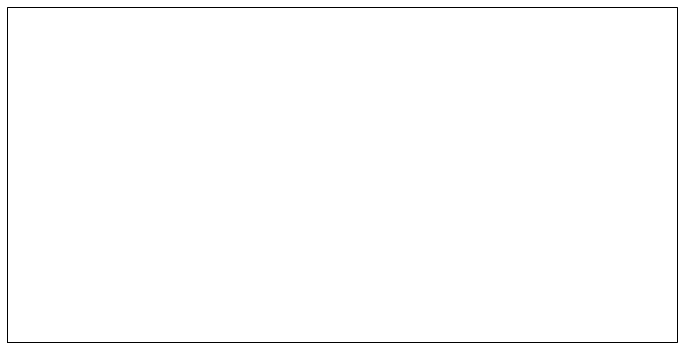

In [27]:
subdict = new_regions['CAMERICA']
lat = subdict['lat_range']
lon = subdict['lon_range']
plot_region(lat,lon, 'CAMERICA')

In [ ]:
def plot_old_vs_new_region(lat, lon, region):
    
    r = pya.Region(region)
    lon_old = r.lon_range
    lat_old = r.lat_range
    
    desired_projections = [ccrs.PlateCarree()]

    fig, axes = plt.subplots(nrows=1, ncols=1,
                             figsize=(12,15), 
                             sharex=True, sharey=True, 
                             subplot_kw = dict(projection=ccrs.PlateCarree()))

    # ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)]

    # xy is The bottom and left rectangle coordinates

    for plot_num, desired_proj in enumerate(desired_projections):

        ax = plt.subplot(2, 1, plot_num + 1, projection=desired_proj)

        ax.set_global()
        
        ax.add_patch(mpatches.Rectangle(xy=[lon_old[0], lat_old[0]], width=np.subtract(lon_old[1], lon_old[0]), 
                                        height=np.subtract(lat_old[1], lat_old[0]),
                                        facecolor='red',
                                        alpha=0.2,
                                        transform= ccrs.PlateCarree())  # ccrs.Geodetic())
                     )
        
        ax.add_patch(mpatches.Rectangle(xy=[lon[0], lat[0]], width=np.subtract(lon[1], lon[0]), 
                                        height=np.subtract(lat[1], lat[0]),
                                        facecolor='blue',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                    )
        import cartopy.feature as cfeature
        states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_0_boundary_lines_land',
                                                scale='50m',
                                                facecolor='none')
        ax.add_feature(states_provinces, edgecolor='gray')
        
        ax.set_title(" {}, NEW: lon_range {}, lat_range{}".format(region, lon, lat))
        ax.gridlines()
        ax.coastlines()

    plt.show()
    return 

In [ ]:
import cartopy.feature as cfeature
cfeature.NaturalEarthFeature?

In [ ]:
region = 'SAFRICA'
subdict = new_regions[region]
lat = subdict['lat_range']
lon = subdict['lon_range']
plot_old_vs_new_region(lat,lon, region)

In [ ]:
region = 'europe'
subdict = new_regions[region]
lat = subdict['lat_range']
lon = subdict['lon_range']
plot_old_vs_new_region(lat,lon, region)

In [ ]:
region = 'SAMERICA'
subdict = new_regions[region]
lat = subdict['lat_range']
lon = subdict['lon_range']
plot_old_vs_new_region(lat, lon, region)

In [28]:
region = 'NAFRICA'
subdict = new_regions[region]
lat = subdict['lat_range']
lon = subdict['lon_range']
plot_old_vs_new_region(lat, lon, region)

NameError: name 'plot_old_vs_new_region' is not defined